<a href="https://colab.research.google.com/github/PSunithya/Stress-Detection/blob/main/Stress_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection:**

In order to predict whether a person is stressed or not, a dataset was selected from Kaggale

# New section

**Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Load the drive helper and mount
from google.colab import drive

#This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [ ]:
trainFile=pd.read_csv("/content/drive/MyDrive/train (2).csv").drop(columns="datasetId")

In [ ]:
testFile=pd.read_csv("/content/drive/MyDrive/test.csv").drop(columns="datasetId")

**Checking for null values**

In [ ]:
trainFile.isnull().values.any()

False

In [ ]:
testFile.isnull().values.any()

False

**Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2265b19130>,
      dtype=object)

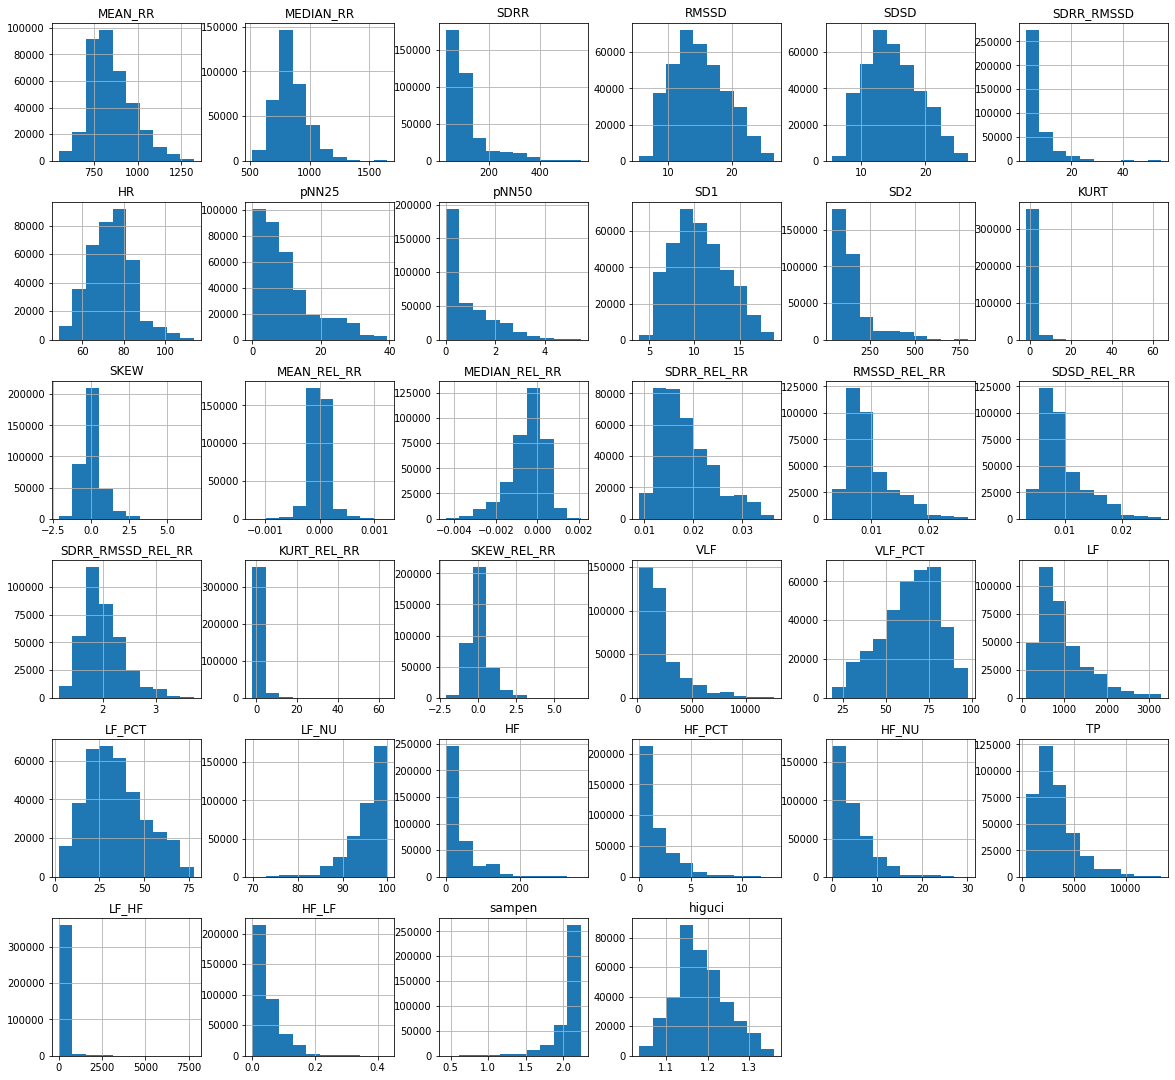

In [ ]:
trainFile.hist(figsize=(20,19))

This dataset comprises of *heart rate variability* (HRV) indices computed from the multimodal SWELL knowledge work (SWELL-KW) dataset for research on stress and user modeling . The SWELL was collected by researchers at the Institute for Computing and Information Sciences at Radboud University. It is a result of experiments conducted on 25 subjects doing typical office work (for example writing reports, making presentations, reading e-mail and searching for information). The subject went through typical working stressors such as receiving unexpected emails interruptions and pressure to complete their work on time. The experiment recorded various data including computer logging, facial expression, body postures, ECG signal, and skin conductance. The researchers also recorded the
subjects’ subjective experience on task load, mental effort, emotion, and perceived stress. Each participant went through three different working conditions:

### no stress:
the subjects are allowed to work on the tasks as long as they needed for a maximum of 45 minutes but they are not aware of the maximum duration of their tasks.


### time pressure:  
during this time, the time to finish the task was reduced to 2/3 of the time the participant took in the neutral condition.

### interruption:
the participants received eight emails in the middle of their assigned tasks. Some emails were relevant to their tasks —and the participant was requested to take specific actions—while others were just irrelevant to their tasks.

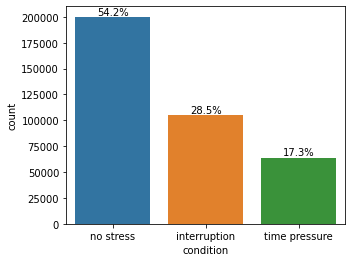

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x = trainFile["condition"])
ncount = len(trainFile)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

**Feature selection**

In [ ]:
#feature extraction
X= trainFile.drop(columns='condition')
Y= trainFile['condition']
xtest= testFile.drop(columns='condition')
ytest= testFile['condition']

**Splitting the dataset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


**Building the K Nearest Neighbors Classifier**

In [ ]:
knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred= knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.9936093584987409


In order to get more understanding about the performance of the classification model, a confusion matrix has been used

In [ ]:
print(classification_report(Y_test, Y_pred))

               precision    recall  f1-score   support

 interruption       0.99      1.00      0.99     20868
    no stress       0.99      0.99      0.99     40169
time pressure       0.99      0.99      0.99     12821

     accuracy                           0.99     73858
    macro avg       0.99      0.99      0.99     73858
 weighted avg       0.99      0.99      0.99     73858



In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[20764   102     2]
 [  116 39968    85]
 [   22   145 12654]]


**Checking for the best value of  k:**


Choose a K value based on the accuracy rate

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
# Calculating error for K values between 1 and 30
for i in range(1,30):

    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,trainFile['condition'],cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Choose a K value based on the error rate

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred= knn.predict(X_test)
    error.append(np.mean(pred!= Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

KeyboardInterrupt: ignored

Therefore, we can assume K=1 is a very good value after the K value selection process. After selecting the best K value we can again run the algorithm with the new K value which equals 1.

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred= knn.predict(X_test)

Check for the accuracy:

In [ ]:
print(accuracy_score(Y_test, Y_pred))

0.9972108640905522


In [ ]:
print(classification_report(Y_test, Y_pred))

               precision    recall  f1-score   support

 interruption       1.00      1.00      1.00     20868
    no stress       1.00      1.00      1.00     40169
time pressure       1.00      0.99      1.00     12821

     accuracy                           1.00     73858
    macro avg       1.00      1.00      1.00     73858
 weighted avg       1.00      1.00      1.00     73858



In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[20825    42     1]
 [   46 40084    39]
 [    6    72 12743]]


**Save model using pickle**

In [ ]:
import pickle
knnPickle = open('knnpickle_file', 'wb')
# source, destination
pickle.dump(knn, knnPickle)
knnPickle.close()

In [ ]:
loaded_model=pickle.load(open('knnpickle_file','rb'))

In [ ]:
i=0
loaded_model.predict([X_test.iloc[i]])

array(['no stress'], dtype=object)

In [ ]:
l=[]
for i in list(trainFile.columns[:-1]):
    l.append(float(input("Please Give the value {0}:".format(i))))

loaded_model.predict([l])


Please Give the value MEAN_RR:832
Please Give the value MEDIAN_RR:834
Please Give the value SDRR:80
Please Give the value RMSSD:5
Please Give the value SDSD:15
Please Give the value SDRR_RMSSD:6
Please Give the value HR:70
Please Give the value pNN25:8
Please Give the value pNN50:0
Please Give the value SD1:10
Please Give the value SD2:120
Please Give the value KURT:0
Please Give the value SKEW:1
Please Give the value MEAN_REL_RR:1
Please Give the value MEDIAN_REL_RR:0
Please Give the value SDRR_REL_RR:1
Please Give the value RMSSD_REL_RR:0
Please Give the value SDSD_REL_RR:1
Please Give the value SDRR_RMSSD_REL_RR:3
Please Give the value KURT_REL_RR:0
Please Give the value SKEW_REL_RR:1
Please Give the value VLF:1520
Please Give the value VLF_PCT:60
Please Give the value LF:900
Please Give the value LF_PCT:45
Please Give the value LF_NU:100
Please Give the value HF:10
Please Give the value HF_PCT:0.9
Please Give the value HF_NU:1.8
Please Give the value TP:2427
Please Give the value L

array(['interruption'], dtype=object)